In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as pl
from scipy.integrate import odeint
from scipy.optimize import least_squares
from scipy import optimize
from datetime import date, timedelta
import random
from datetime import datetime

state_dic={'AC': 'Acre',
 'AL': 'Alagoas',
 'AP': 'Amapá',
 'AM': 'Amazonas',
 'BA': 'Bahia',
 'CE': 'Ceará',
 'DF': 'Federal District',
 'ES': 'Espírito Santo',
 'GO': 'Goiás',
 'MA': 'Maranhão',
 'MT': 'Mato Grosso',
 'MS': 'Mato Grosso do Sul',
 'MG': 'Minas Gerais',
 'PA': 'Pará',
 'PB': 'Paraíba',
 'PR': 'Paraná',
 'PE': 'Pernambuco',
 'PI': 'Piauí',
 'RJ': 'Rio de Janeiro',
 'RN': 'Rio Grande do Norte',
 'RS': 'Rio Grande do Sul',
 'RO': 'Rondônia',
 'RR': 'Roraima',
 'SC': 'Santa Catarina',
 'SP': 'São Paulo',
 'SE': 'Sergipe',
 'TO': 'Tocantins'}
population={
    'AC': 894470,
 'AL': 3351543,
 'AP': 861773,
 'AM': 4207714,
 'BA': 14930634,
 'CE': 9187103,
 'DF': 3005149,
 'ES': 4064052,
 'GO': 7113540,
 'MA': 7114598,
 'MT': 2809394,
 'MS': 2809394,
 'MG': 21292666,
 'PA': 9860745,
 'PB': 7036277,
 'PR': 11516840,
 'PE': 9616621,
 'PI': 3281480,
 'RJ': 17366189,
 'RN': 3534165,
 'RS': 11422973,
 'RO': 1796460,
 'RR': 631181,
 'SC': 7252502,
 'SP': 46289333,
 'SE': 2318822,
 'TO': 1590248}


def kappa(t,a0,a1,a2,a3,t1,t2,t3):
    if t<=t1:
        kappa=a0
    elif t2>=t>t1:
        kappa=a1
    elif t3>=t>t2:
        kappa=a2
    elif t>t3:
        kappa=a3
    return kappa

def nu(t,b0,b1,b2,b3,t1,t2,t3):
    if t<=t1:
        nu=b0
    elif t2>=t>t1:
        nu=b1
    elif t3>=t>t2:
        nu=b2
    elif t>t3:
        nu=b3
    return nu

def SIR(f,t,parametros):
    #parameters
    a0,a1,a2,a3,b0,b1,b2,b3,t1,t2,t3, g = parametros
    #variables
    S = f[0]
    I = f[1]
    R = f[2]
    Nc = f[3]
    #equations inclunding epidemic curve
    dS_dt = -kappa(t,a0,a1,a2,a3,t1,t2,t3)*(S/N)**(1+1/kappa(t,a0,a1,a2,a3,t1,t2,t3))*I/(nu(t,b0,b1,b2,b3,t1,t2,t3))
    dI_dt = kappa(t,a0,a1,a2,a3,t1,t2,t3)*(S/N)**(1+1/kappa(t,a0,a1,a2,a3,t1,t2,t3))*I/(nu(t,b0,b1,b2,b3,t1,t2,t3)) - g*I 
    dR_dt = g*I

    
    #new cases rate
    dNc_dt = kappa(t,a0,a1,a2,a3,t1, t2,t3)*(S/N)**(1+1/kappa(t,a0,a1,a2,a3,t1, t2,t3))*I/(nu(t,b0,b1,b2,b3,t1,t2,t3))
    
    return [dS_dt,dI_dt,dR_dt,dNc_dt]


def lq_SIR(pars, ts0):
    a0,a1,a2,a3,b0,b1,b2,b3,t1,t2,t3,g,i0,subn = pars
    #initial conditions
    q0 = [N-i0,i0,0,0]
    #parameters
    parode = a0,a1,a2,a3,b0,b1,b2,b3,t1,t2,t3,g
    #calls integrator
    qs = odeint(SIR,q0, ts0,args=(parode,),mxstep=1000000)

    qi = subn*qs[:,-1]
    #define the standardized residuals
    err = (qi - data) / np.sqrt(qi+1)
    return np.r_[err] 





def Best_Fit(data,n_tries):

    # #DEEFINE THE INTERVALS OF PARS
    intervals = np.array([ [0., 100], #a0
                           [0., 100], #a1
                           [0., 100], #a2
                           [0., 100], #a3
                           [0., 100], #b0
                           [0., 100] ,#b1
                           [0., 100], #b2
                           [0., 100], #b3
                           [15, 40],#t1
                           [40, 100],#t2
                           [100,190], #t3
                           [1/5, 1/3], #g
                           [0, 25],   #i0
                           [0.15, 0.25] #subn
                           ])

    #NUMBER OF FITS

    #best error starts at inft 
    best_err = np.inf
    #aj the number of best fists 
    aj = 0

    for i in range(n_tries):
        
        
        #create a set of parameters in the interval
        par0 = np.random.rand(len(intervals))
        par0 = intervals[:,0] + par0 * (intervals[:,1] - intervals[:,0])
        #try to fit
        try:
            res = least_squares(lambda pars: lq_SIR(pars,ts0), par0, bounds=(intervals[:,0], \
                                                     intervals[:,1]))

            ier = res.status
            #if converges
            if ier >= 1 and ier <= 4:
                if res.cost < best_err:
                    #best_err = erro
                    best_err = res.cost
                    #best_pop = parametro
                    best_pop = res.x
                    #+1 best fit
                    aj = aj +1
                    print('achou',aj)
                    print(str(best_err))

            #in does not converge, do nothing
        except:pass

    return best_pop



Current Time = 12:53:40
achou 1
7575049.759019037


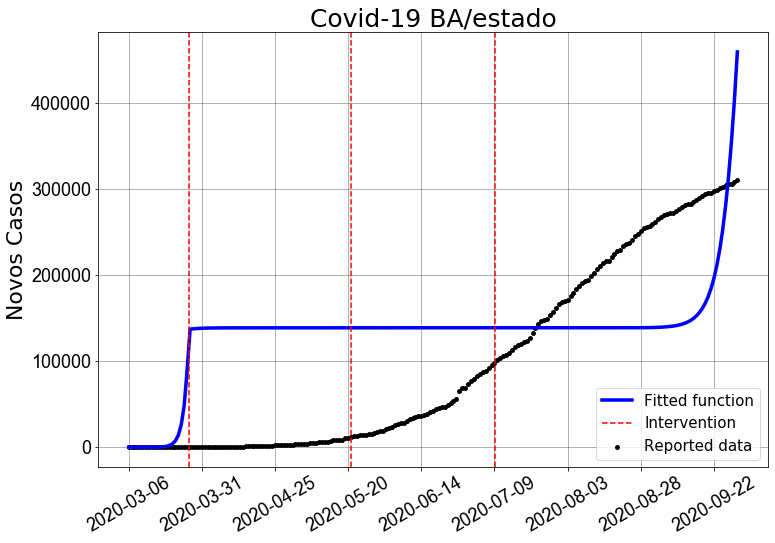

Current Time = 12:53:46


In [7]:
now = datetime.now()

current_time = now.strftime("%H:%M:%S")
print("Current Time =", current_time)

#Define the state and the type of fit: (estado,capital,interior)



s='BA'
file='estado'

N=population[s]

#Read csv
df=pd.read_csv('Data/'+s+"/"+file+".csv")

#Limit the date of the Fit
df = df.query("date <= '2020-09-30'")

#Read the file
dates=df.date.values
data=df.cases.values
new_cases = [0]*len(data)
for x in range(len(data)):
    if x==0:
        new_cases[x] = data[0]
    else:
        new_cases[x] = data[x]-data[x-1]

ts0=np.arange(len(data))


#Run the minimizer
n_tries=1 #Quanto maior mais certeza do resultado. Colocar em 100 para roda com mais certeza (Ou até maiws se for necessário)
best_pop=Best_Fit(data,n_tries)

a0, a1,a2,a3,b0,b1,b2,b3,t1,t2,t3, g, i0, subn=best_pop
#Create an x axixis for plotting the function.


q0 = [N-i0,i0,0,0]
    #parameters
parode = a0, a1,a2,a3,b0,b1,b2,b3,t1,t2,t3, g
#calls integrator
qs = odeint(SIR,q0, ts0,args=(parode,),mxstep=1000000)

qi = subn*qs[:,-1] #Casos acumulados

ni= subn*np.array([qs[:,-1][0]]+list(np.diff(qs[:,-1]))) #Novos Casos


#################################CRIAÇÃO DO PLOT#################################

rp = str(subn)

#Plotting
#Create the figure and the graph.
fig, ax = pl.subplots(figsize=(12,8))

#Create a grid for visualization.
ax.grid(which='major', axis='both', color='black',linewidth=1.,alpha=0.3)

#Plot the points(Scatters). s=size, zorder= priority->(puttin g the points in at the front of everything).
#ax.scatter(dates,new_cases, s=15,color='black',zorder=1,label='Reported data') #newcases
ax.scatter(dates,data, s=15,color='black',zorder=1,label='Reported data') #culmulative cases

#Plot the fitted function as a line.
#ax.plot(dates,ni,color='blue',zorder=2, linewidth=3.5,label='Fitted function') #newcases
ax.plot(dates,qi,color='blue',zorder=2, linewidth=3.5,label='Fitted function') #culmulativecases

ax.axvline(t1, 0, 600,c='r',linestyle='--',label='Intervention')
ax.axvline(t2, 0, 600,c='r',linestyle='--')
ax.axvline(t3, 0, 600,c='r',linestyle='--')




#Set the labels
ax.set_ylabel('Novos Casos',fontsize=22)

#Set the title
ax.set_title('Covid-19 '+s+'/'+file,fontsize=25)

#The size of the numbers on the axixis
ax.tick_params(labelsize=18)

#Limiting the ammount of dates on the X axixs
ax.xaxis.set_major_locator(pl.MaxNLocator(10))
#Rotating the dates for better visualization
pl.setp(ax.get_xticklabels(), rotation=30)

#label
ax.legend(loc='lower right',fontsize=15)

#Setting the font of the numbers on the axixis as ARIAL 
for tick in ax.get_xticklabels():
    tick.set_fontname("Arial")
for tick in ax.get_yticklabels():
    tick.set_fontname("Arial")  

#Show Graph       


pl.show()

#Save Fig
fig.savefig(r"Fit_hete\\"+s+"\\Culmutalive_cases_"+s+".png",bbox_inches='tight')



####################################SALVANDO PARAMETROS NO CSV####################################

# param_dict={'a0':best_pop[0],
#             'a1':best_pop[1],
#             'a2':best_pop[2],
#             'a3':best_pop[3],
#             'b0':best_pop[4],
#             'b1':best_pop[5],
#             'b2':best_pop[6],
#             'b3':best_pop[7],
#             't1':best_pop[8],
#             't2':best_pop[9],
#             't3':best_pop[10],
#             'g':best_pop[11],
#             'i0':best_pop[12],
#             'subn':best_pop[13]}

# pd.DataFrame([param_dict])



dic_base={'source':[],'a0':[],'a1':[],'a2':[],'a3':[],'b0':[],'b1':[],'b2':[],'b3':[],'t1':[],'t2':[],'t3':[],'g':[],'i0':[],'subn':[],}

pops= pd.DataFrame(dic_base)
pops.to_csv('C:\\Users\\Robert\\Google Drive\\UFBA\\iniciacao_cientifica_2020-2021\\Covid\\best_fits\\Best_fits_'+s+'.csv',index=False)
pops=pd.read_csv('C:\\Users\\Robert\\Google Drive\\UFBA\\iniciacao_cientifica_2020-2021\\Covid\\best_fits\\Best_fits_'+s+'.csv')

save_pop=[s]
for saves in best_pop:
    save_pop.append(saves)


pops.loc[len(pops)]=save_pop

pops.to_csv('C:\\Users\\Robert\\Google Drive\\UFBA\\iniciacao_cientifica_2020-2021\\Covid\\best_fits\\Best_fits_'+s+'.csv',index=False)




#################################TEMPO DE INTEGRACAO#################################

now = datetime.now()

current_time = now.strftime("%H:%M:%S")
print("Current Time =", current_time)

In [8]:
best_pop

array([ 64.80439144,   0.5648591 ,  18.59939734,  47.7454797 ,
        70.84558849,  99.19923968,  84.77024238,  84.82137143,
        20.70661543,  75.9088903 , 125.21065047,   0.28503408,
         1.44396975,   0.15369028])

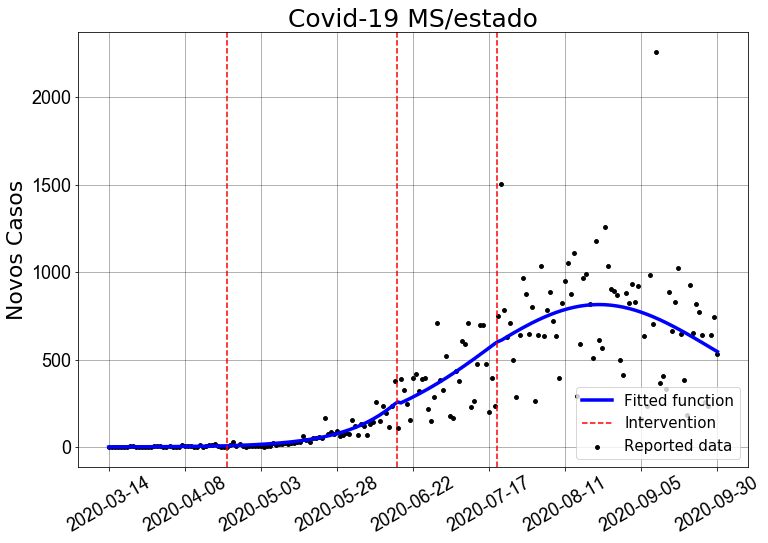

In [6]:

#Plotting
#Create the figure and the graph.
fig, ax = pl.subplots(figsize=(12,8))

#Create a grid for visualization.
ax.grid(which='major', axis='both', color='black',linewidth=1.,alpha=0.3)

#Plot the points(Scatters). s=size, zorder= priority->(puttin g the points in at the front of everything).
ax.scatter(dates,new_cases, s=15,color='black',zorder=1,label='Reported data') #newcases
#ax.scatter(dates,data, s=15,color='black',zorder=1,label='Reported data') #culmulative cases

#Plot the fitted function as a line.
ax.plot(dates,ni,color='blue',zorder=2, linewidth=3.5,label='Fitted function') #newcases
#ax.plot(dates,qi,color='blue',zorder=2, linewidth=3.5,label='Fitted function') #culmulativecases

ax.axvline(t1, 0, 600,c='r',linestyle='--',label='Intervention')
ax.axvline(t2, 0, 600,c='r',linestyle='--')
ax.axvline(t3, 0, 600,c='r',linestyle='--')





#Set the labels
ax.set_ylabel('Novos Casos',fontsize=22)

#Set the title
ax.set_title('Covid-19 '+s+'/'+file,fontsize=25)

#The size of the numbers on the axixis
ax.tick_params(labelsize=18)

#Limiting the ammount of dates on the X axixs
ax.xaxis.set_major_locator(pl.MaxNLocator(10))
#Rotating the dates for better visualization
pl.setp(ax.get_xticklabels(), rotation=30)

#label
ax.legend(loc='lower right',fontsize=15)

#Setting the font of the numbers on the axixis as ARIAL 
for tick in ax.get_xticklabels():
    tick.set_fontname("Arial")
for tick in ax.get_yticklabels():
    tick.set_fontname("Arial")  

#Show Graph       
#pl.show()

#Save Fig
fig.savefig(r"Fit_hete\\"+s+"\\New_cases_"+s+".png",bbox_inches='tight') #novos casos




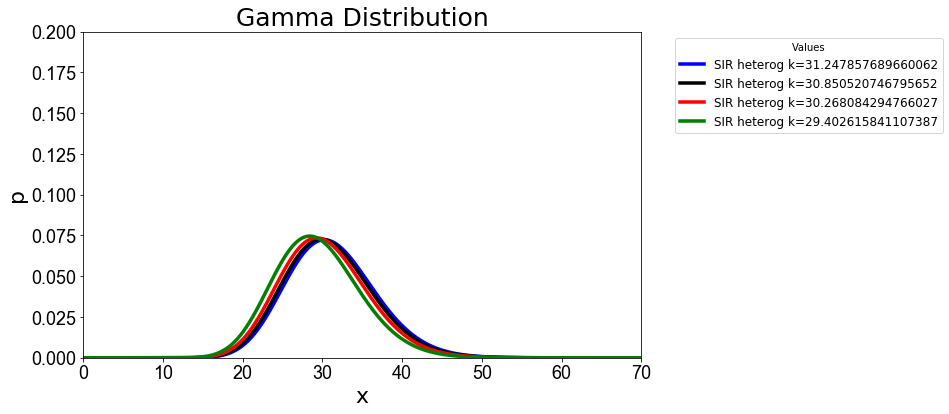

In [8]:
#Plot distribuições


import numpy as np
import scipy.stats as stats 
from matplotlib import pyplot as plt



K = np.array([best_pop[0],best_pop[1],best_pop[2],best_pop[3]])
kap = np.array([str(K[0]),str(K[1]),str(K[2]),str(K[3])])

V = np.array([best_pop[4],best_pop[5],best_pop[6],best_pop[7]])
Nu = np.array([str(V[0]),str(V[1]),str(V[2]),str(V[3])])

x = np.linspace (0, 100, 50000) 
y1 = stats.gamma.pdf(x, a= K[0], loc=1/(N*V[0])) #a is kappa, loc is 1/nu
y2 = stats.gamma.pdf(x, a= K[1], loc=1/(N*V[1])) #a is kappa, loc is 1/nu
y3 = stats.gamma.pdf(x, a= K[2], loc=1/(N*V[2])) #a is kappa, loc is 1/nu
y4 = stats.gamma.pdf(x, a= K[3], loc=1/(N*V[3])) #a is kappa, loc is 1/nu



fig, ax = plt.subplots(figsize=(10,6))
ax.set_title('SIR',fontsize=25)

p1,=ax.plot(x,y1,'b-', linewidth=3.5,label='SIR heterog k='+kap[0] )
p2,=ax.plot(x,y2,'k-', linewidth=3.5,label='SIR heterog k='+kap[1] )
p3,=ax.plot(x,y3,'r-', linewidth=3.5,label='SIR heterog k='+kap[2] )
p4,=ax.plot(x,y4,'g-', linewidth=3.5,label='SIR heterog k='+kap[3] )
ax.set_ylabel('p',fontsize=22)
ax.set_xlabel('x',fontsize=22)

#Set the title
ax.set_title('Gamma Distribution',fontsize=25)

#The size of the numbers on the axixis
ax.tick_params(labelsize=18)

#label
from matplotlib.font_manager import FontProperties
fontP = FontProperties()
fontP.set_size('large')
#ax.legend(loc='upper right',fontsize=15)
pl.legend(handles=[p1,p2,p3,p4], title='Values', bbox_to_anchor=(1.05, 1), loc='upper left', prop=fontP)

#Setting the font of the numbers on the axixis as ARIAL 
for tick in ax.get_xticklabels():
    tick.set_fontname("Arial")
for tick in ax.get_yticklabels():
    tick.set_fontname("Arial")  

ax.set_xlim(0,70)
ax.set_ylim(0,0.2)


#plt.show()




fig.savefig(r"Fit_hete\\"+s+"\\Gamma_"+s+".png",bbox_inches='tight')

In [5]:
best_pop.tofile('my_csv.csv', sep=',', format='%s')

In [17]:
param_dict={'a0':best_pop[0],
            'a1':best_pop[1],
            'a2':best_pop[2],
            'a3':best_pop[3],
            'b0':best_pop[4],
            'b1':best_pop[5],
            'b2':best_pop[6],
            'b3':best_pop[7],
            't1':best_pop[8],
            't2':best_pop[9],
            't3':best_pop[10],
            'g':best_pop[11],
            'i0':best_pop[12],
            'subn':best_pop[13]}

dic_base={'Source':[],'a0':[],'a1':[],'a2':[],'a3':[],'b0':[],'b1':[],'b2':[],'b3':[],'t1':[],'t2':[],'t3':[],'g':[],'i0':[],'subn':[],}

pops= pd.DataFrame(dic_base)
pops.to_csv('Best_Fits_new.csv',index=False)

In [18]:
pops_base={'Source':[],'beta_0':[],'beta_1':[],'delta':[],'p':[]}
pops= pd.DataFrame(pops_base)
pops.to_csv('Best_Fits_new.csv',index=False)

In [10]:
best_pop


array([ 28.98223325,  31.0257455 ,  22.27404538,  27.00896067,
        53.4506844 ,  83.67000255,  63.19225846,  78.87584838,
        16.83069753,  74.50968153, 117.55114736,   0.30963977,
         8.63788576,   0.1210228 ])

In [18]:
len(data)

207